1. Lectura del archivo y exploración inicial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\chavs\Downloads\vgsales.csv")

print(df.head())

print(df.tail())

print(df.sample(5))

print(df.describe())

print(df.info())


KeyboardInterrupt



2. Totales

1) Total de videojuegos analizados

In [ ]:
total_videojuegos = df.shape[0]
print(f"Total de videojuegos analizados: {total_videojuegos}")

Total de videojuegos analizados: 16598


2) Total de géneros analizados

In [ ]:
total_generos = df['Genre'].nunique()
print(f"Total de géneros analizados: {total_generos}")

Total de géneros analizados: 12


3) Plataformas analizadas

In [ ]:
total_plataformas = df['Platform'].nunique()
print(f"Total de plataformas analizadas: {total_plataformas}")

Total de plataformas analizadas: 31


3. Ventas

1) Total de ventas por año

<Figure size 1400x700 with 0 Axes>

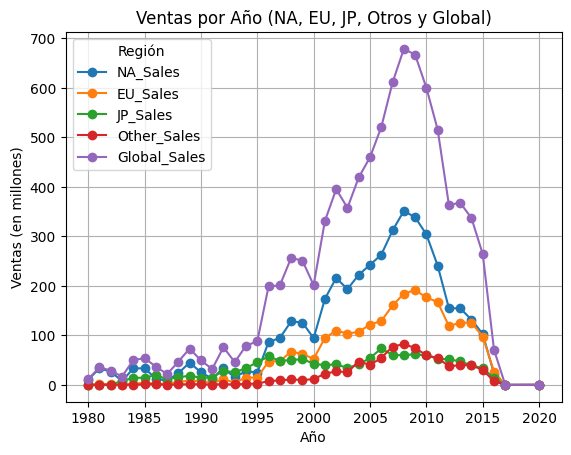

In [ ]:
ventas_por_año = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

plt.figure(figsize=(14, 7))
ventas_por_año.plot(kind='line', marker='o')
plt.title('Ventas por Año (NA, EU, JP, Otros y Global)')
plt.xlabel('Año')
plt.ylabel('Ventas (en millones)')
plt.legend(title='Región')
plt.grid(True)
plt.show()

2) Juegos más vendidos por año

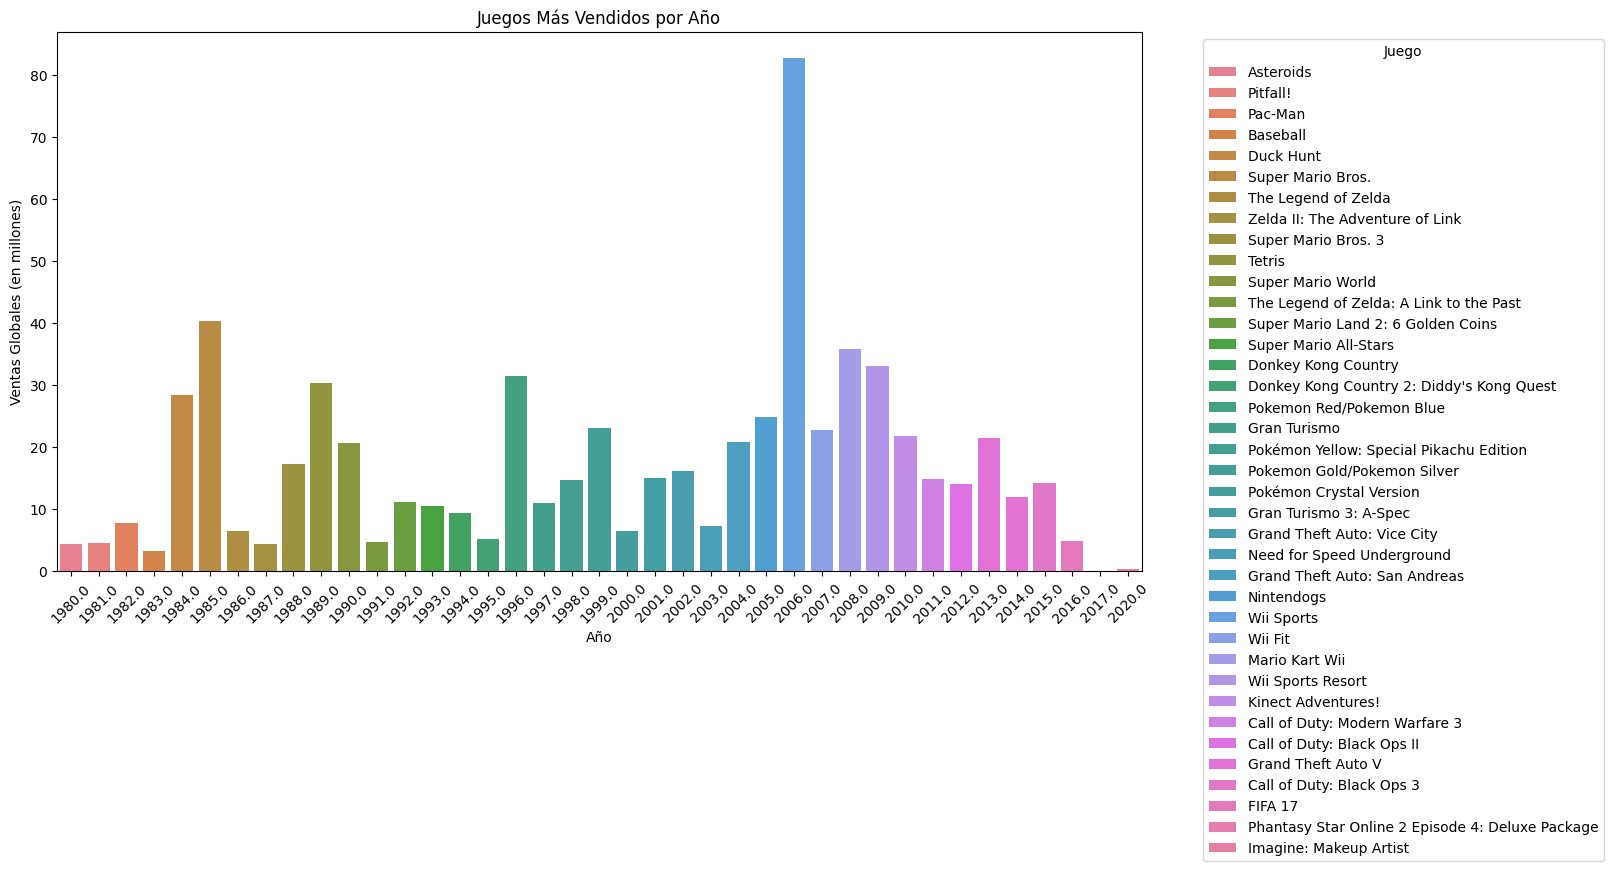

In [ ]:
juegos_mas_vendidos_por_año = df.loc[df.groupby('Year')['Global_Sales'].idxmax()]

plt.figure(figsize=(14, 7))
sns.barplot(x='Year', y='Global_Sales', hue='Name', data=juegos_mas_vendidos_por_año, dodge=False)
plt.title('Juegos Más Vendidos por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (en millones)')
plt.legend(title='Juego', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

3) Plataformas con más ingresos por año

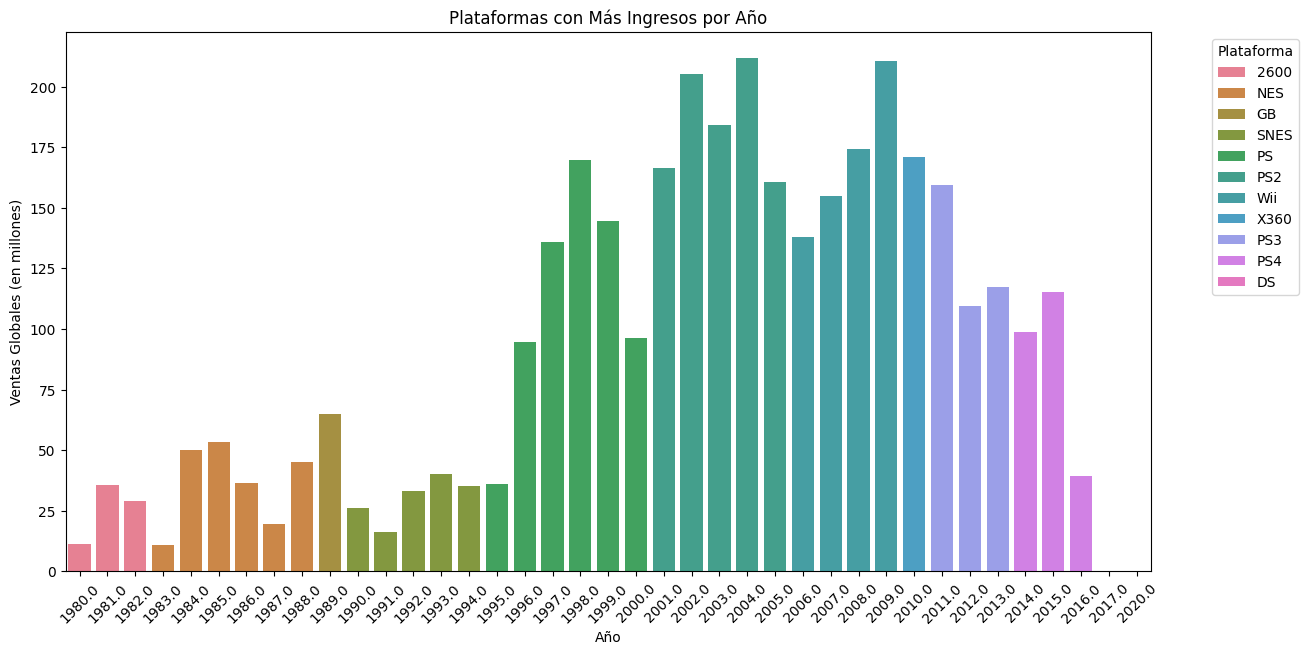

In [ ]:
plataformas_mas_ingresos_por_año = df.groupby(['Year', 'Platform'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()
plataformas_mas_ingresos_por_año = plataformas_mas_ingresos_por_año.loc[plataformas_mas_ingresos_por_año.groupby('Year')['Global_Sales'].idxmax()]

plt.figure(figsize=(14, 7))
sns.barplot(x='Year', y='Global_Sales', hue='Platform', data=plataformas_mas_ingresos_por_año, dodge=False)
plt.title('Plataformas con Más Ingresos por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (en millones)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

4) Gráfico de comparación de ventas entre géneros por año

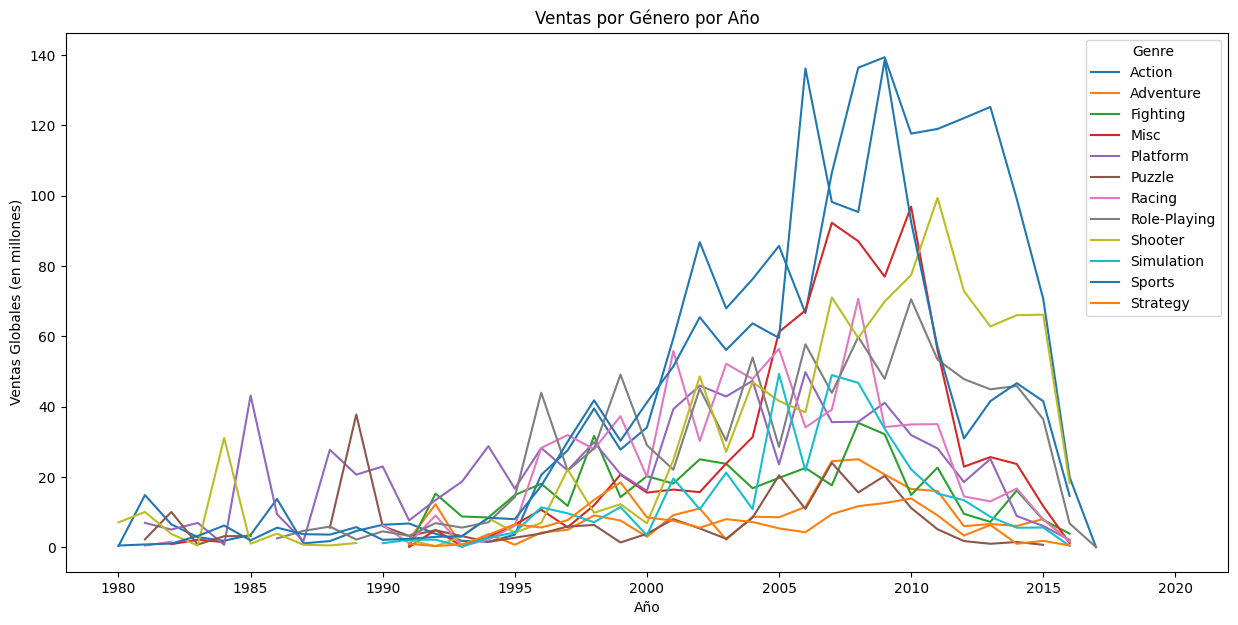

In [ ]:
ventas_por_genero_año = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()
ventas_por_genero_año.plot(kind='line', figsize=(15, 7))
plt.title('Ventas por Género por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

4. Insights: 2 Gráficos adicionales interesantes

1) Distribución de ventas globales por plataforma

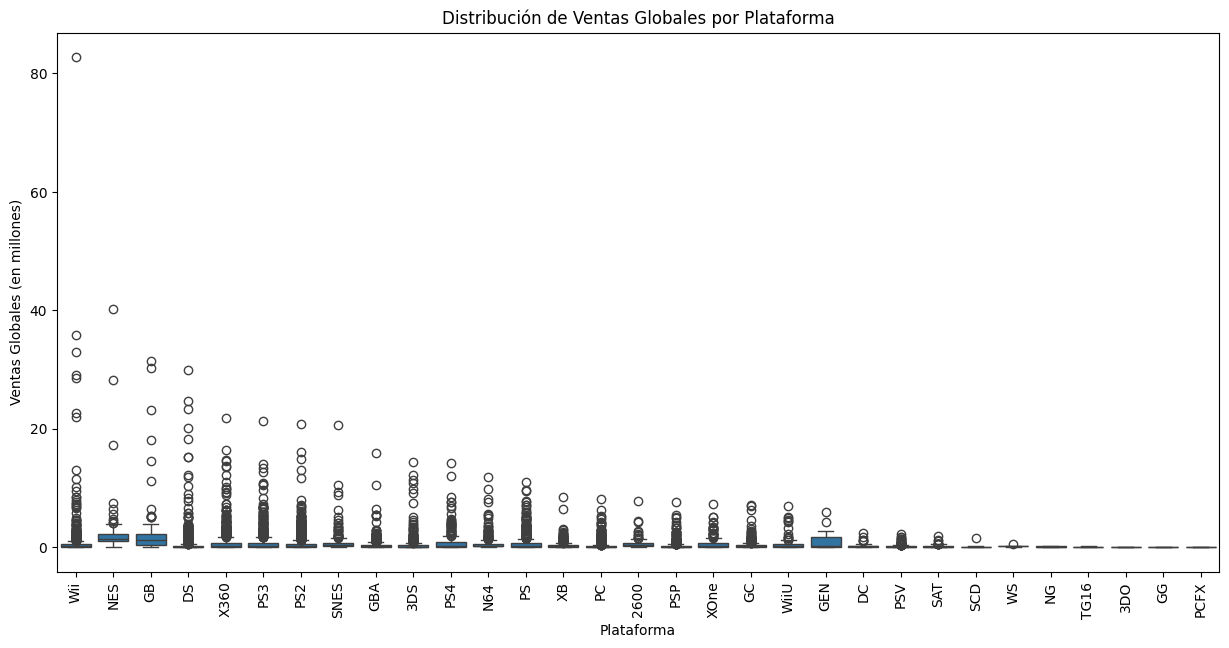

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Platform', y='Global_Sales', data=df)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=90)
plt.show()

2) Top 10 juegos más vendidos

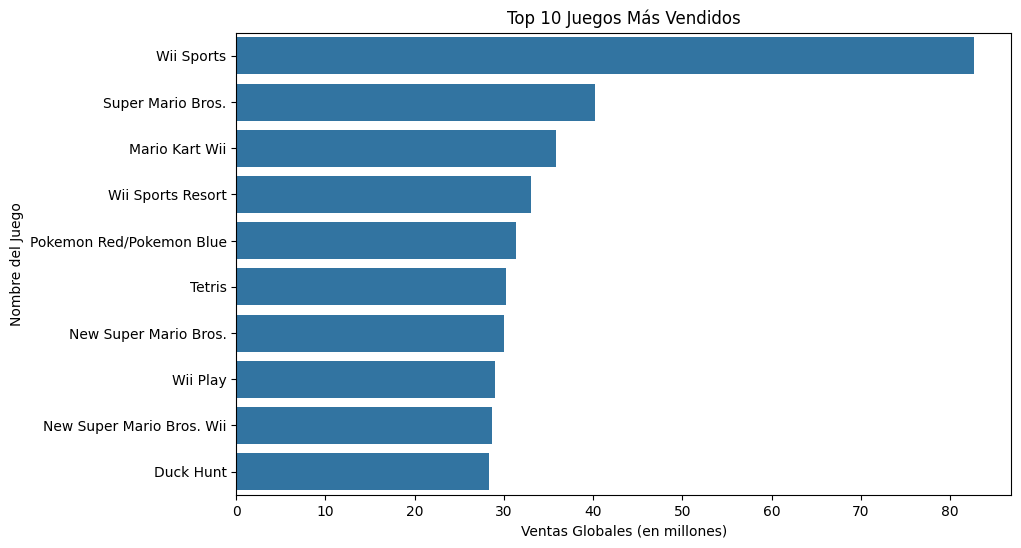

In [ ]:
top_10_juegos = df.nlargest(10, 'Global_Sales')[['Name', 'Global_Sales']]
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_10_juegos)
plt.title('Top 10 Juegos Más Vendidos')
plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Nombre del Juego')
plt.show()

5. Crecimiento

1) Género con mayor y menor crecimiento

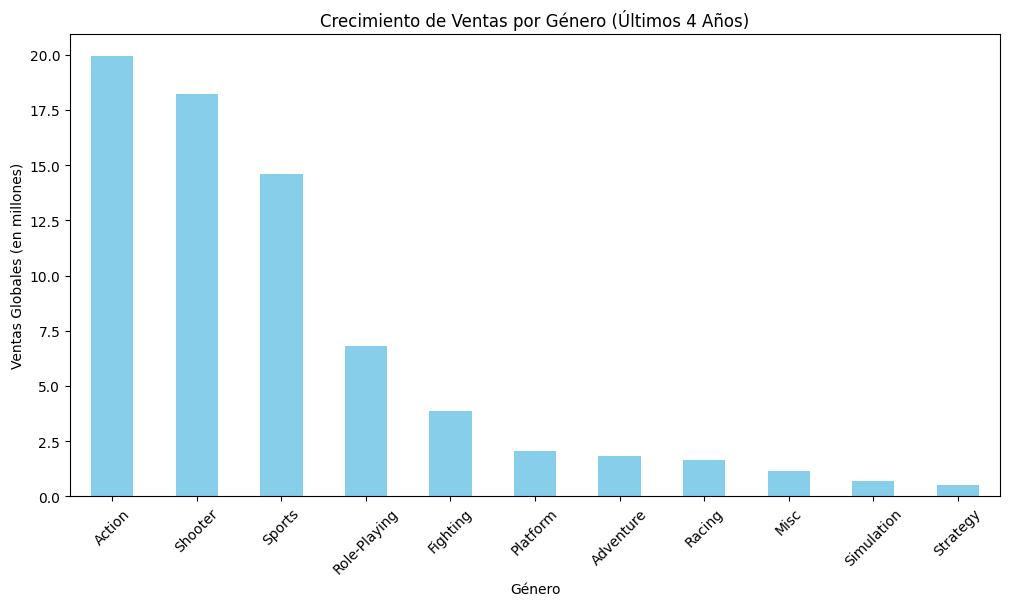

In [ ]:
df_reciente = df[df['Year'] >= df['Year'].max() - 4]

crecimiento_genero = df_reciente.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
crecimiento_genero.plot(kind='bar', color='skyblue')
plt.title('Crecimiento de Ventas por Género (Últimos 4 Años)')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.show()

2) Plataforma con mayor y menor crecimiento

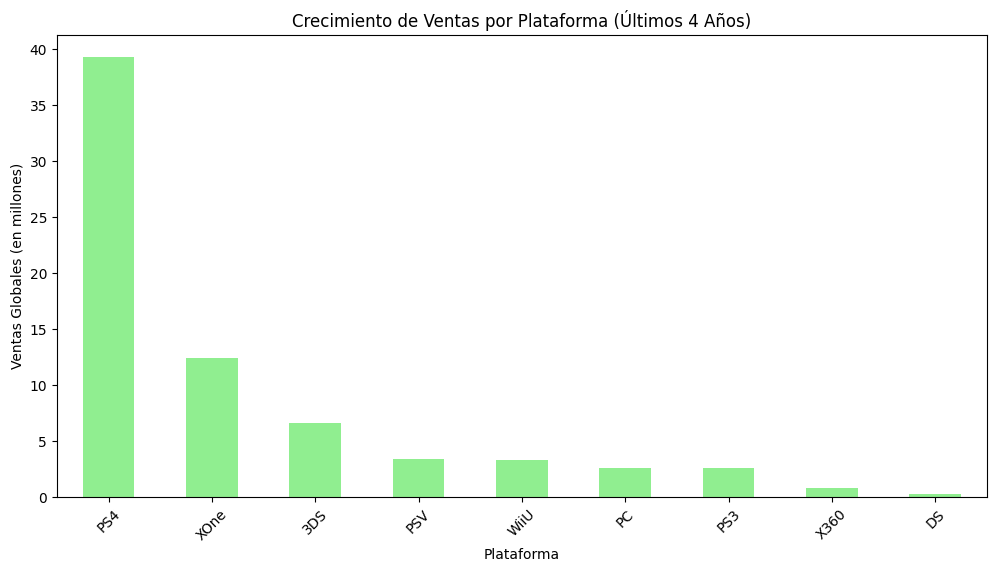

In [ ]:
crecimiento_plataforma = df_reciente.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
crecimiento_plataforma.plot(kind='bar', color='lightgreen')
plt.title('Crecimiento de Ventas por Plataforma (Últimos 4 Años)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.show()

3) Videojuego con mayor y menor crecimiento

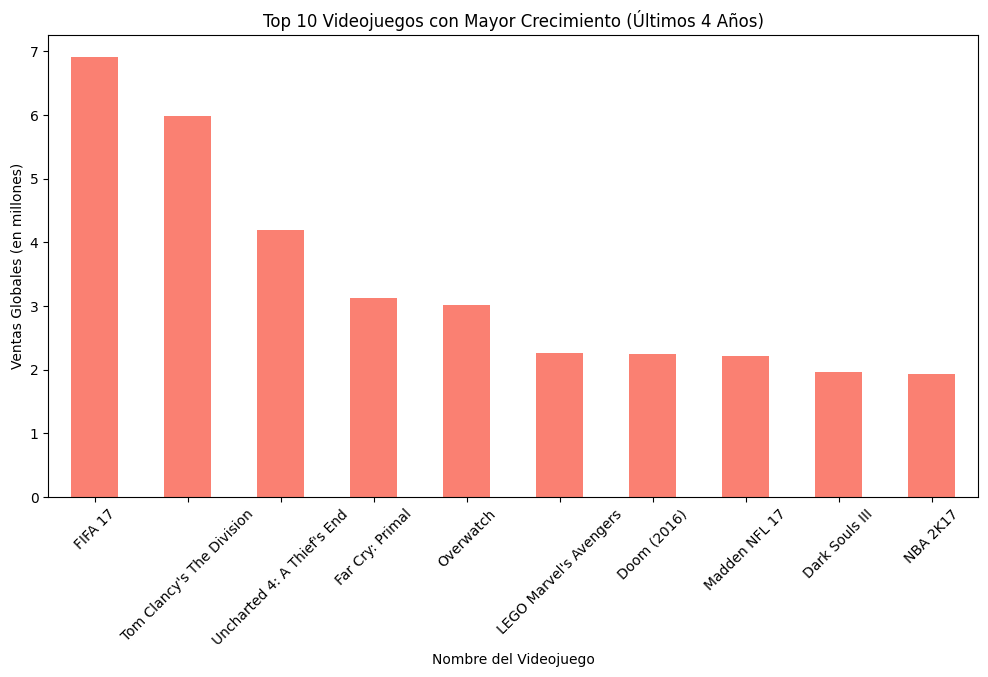

In [ ]:
crecimiento_juego = df_reciente.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
crecimiento_juego.plot(kind='bar', color='salmon')
plt.title('Top 10 Videojuegos con Mayor Crecimiento (Últimos 4 Años)')
plt.xlabel('Nombre del Videojuego')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.show()

6. Oportunidades de mercado

1) Géneros emergentes

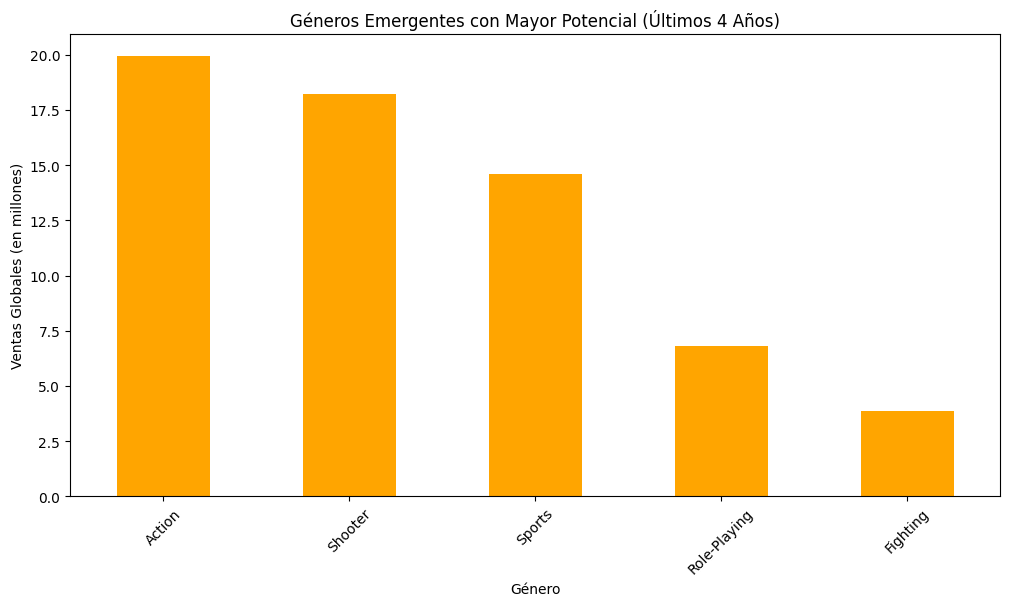

In [ ]:
generos_emergentes = df_reciente.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
generos_emergentes.plot(kind='bar', color='orange')
plt.title('Géneros Emergentes con Mayor Potencial (Últimos 4 Años)')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.show()

2) Plataformas con menor penetración de mercado

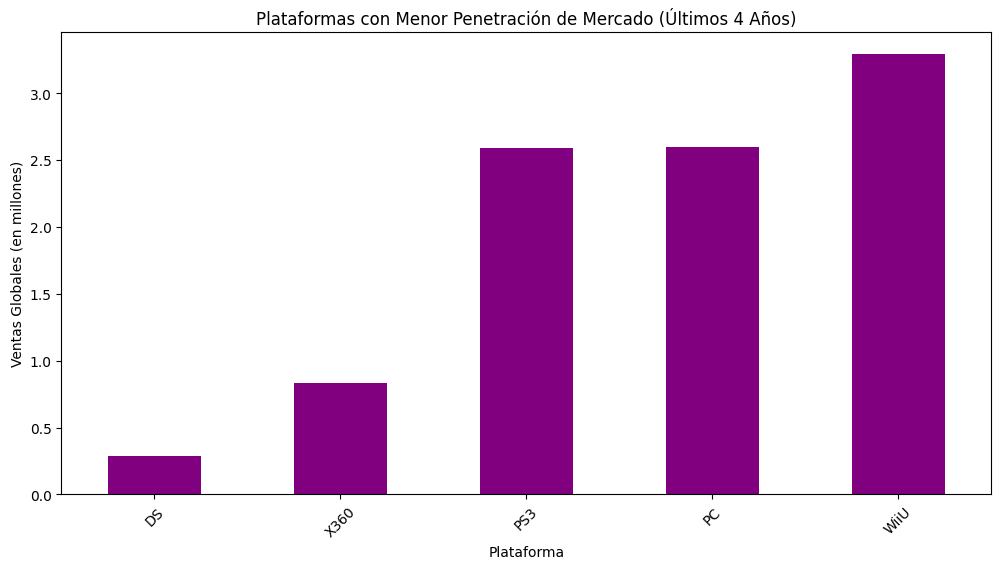

In [ ]:
plataformas_menor_penetracion = df_reciente.groupby('Platform')['Global_Sales'].sum().sort_values().head(5)

plt.figure(figsize=(12, 6))
plataformas_menor_penetracion.plot(kind='bar', color='purple')
plt.title('Plataformas con Menor Penetración de Mercado (Últimos 4 Años)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.show()